## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## **Reading the data**

In [ ]:
data = pd.read_excel('Online Retail.xlsx')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

## **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data = data[data['CustomerID'].notnull()]

In [ ]:
data.shape

(406829, 8)

## RFM Analysis 
**Recency, frequency, monetary value (RFM) is a marketing analysis tool used to identify a firm’s best clients based on the nature of their spending habits.**

Creating 'amount' column for amount of each purchase

In [ ]:
data['amount'] = data['Quantity'] * data['UnitPrice']

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
monetary = data.groupby('CustomerID')['amount'].sum()

In [ ]:
monetary = monetary.reset_index()

In [ ]:
monetary.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Creating 'Frequency' column for purchase frequency.

In [ ]:
frequency = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [ ]:
frequency.columns = ['CustomerID', 'Frequency']

In [ ]:
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Creating 'Recency' column for getting the total days till the last purchase

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format = '%d-%m-%Y %H:%M')

In [ ]:
data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
last_day = max(data['InvoiceDate'])

In [ ]:
last_day

Timestamp('2011-12-09 12:50:00')

In [ ]:
data['day_diff'] = last_day - data['InvoiceDate']

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,day_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
def get_absolute_days(x):
    y = str(x).split()[0]
    return int(y)
data['day_diff'] = data['day_diff'].apply(get_absolute_days)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,day_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [ ]:
recency = data.groupby('CustomerID')['day_diff'].min().reset_index()

In [ ]:
recency.columns = ['CustomerID', 'recency']

In [ ]:
recency.head()

,CustomerID,recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


Merging the Recency, Monetary and Frequrncy dataframe into a single dataframe.

In [ ]:
grouped_df = pd.merge(monetary, frequency, on = 'CustomerID', how = 'inner')

In [ ]:
rmf_df = pd.merge(grouped_df, recency, on = 'CustomerID', how = 'inner')

In [ ]:
rmf_df

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


## **Outliers**

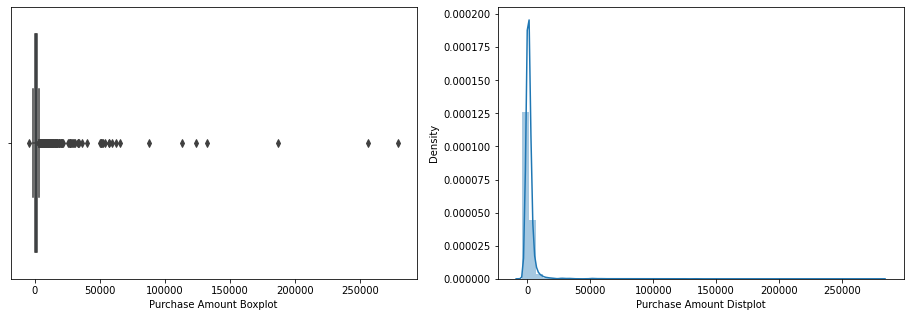

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(rmf_df['amount'])
plt.xlabel('Purchase Amount Boxplot')
plt.subplot(1,2,2)
sns.distplot(rmf_df['amount'])
plt.xlabel('Purchase Amount Distplot')
plt.show()

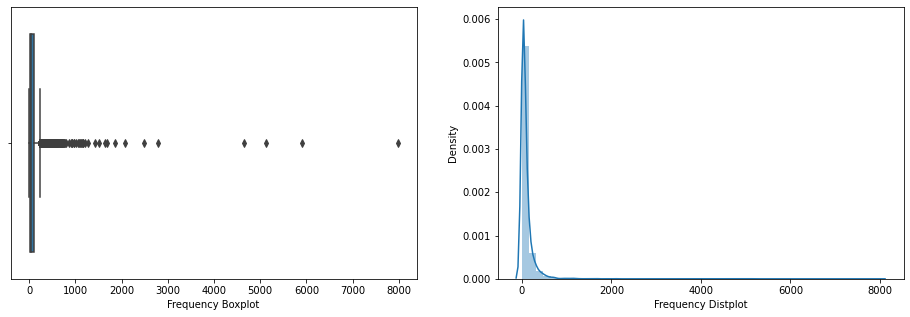

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(rmf_df['Frequency'])
plt.xlabel('Frequency Boxplot')
plt.subplot(1,2,2)
sns.distplot(rmf_df['Frequency'])
plt.xlabel('Frequency Distplot')
plt.show()

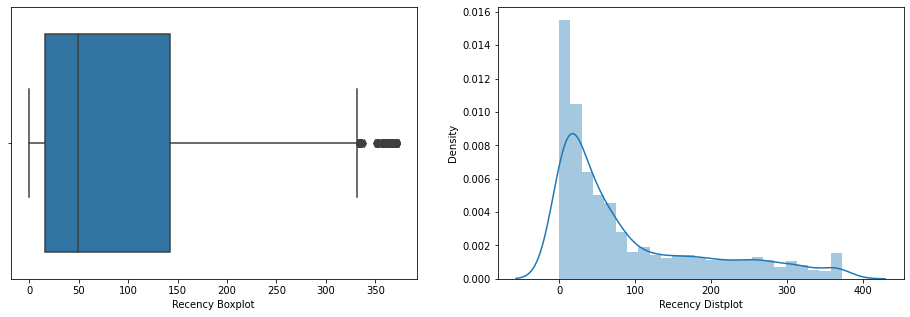

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(rmf_df['recency'])
plt.xlabel('Recency Boxplot')
plt.subplot(1,2,2)
sns.distplot(rmf_df['recency'])
plt.xlabel('Recency Distplot')
plt.show()

## **Removing Outliers**

In [ ]:
outlier_vars = ['amount','recency','Frequency']
for column in outlier_vars:
    
    lower_quartile = rmf_df[column].quantile(0.25)
    upper_quartile = rmf_df[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 1.5
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = rmf_df[(rmf_df[column] < min_border) | (rmf_df[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    rmf_df.drop(outliers, inplace = True)

423 outliers detected in column amount
81 outliers detected in column recency
239 outliers detected in column Frequency


In [ ]:
rmf_df.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35


In [ ]:
rmf_df = rmf_df.reset_index(drop=True)

In [ ]:
rmf_df.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325
1,12348.0,1797.24,31,74
2,12349.0,1757.55,73,18
3,12350.0,334.40,17,309
4,12352.0,1545.41,95,35


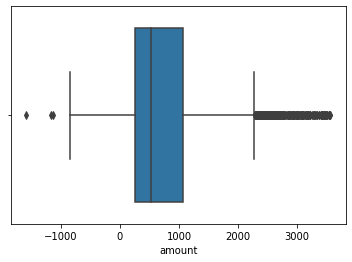

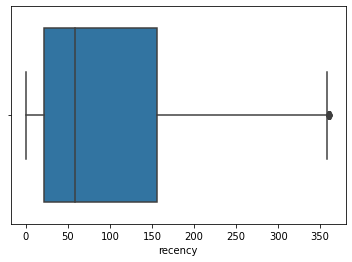

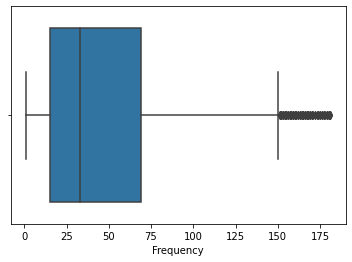

In [ ]:
for col in ['amount','recency','Frequency']:
    sns.boxplot(rmf_df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
rmf_df.shape

(3629, 4)

## **Standardizing the data for kmeans clustering**

In [ ]:
scaled_df = rmf_df[['amount','recency','Frequency']]

In [ ]:
scalar = StandardScaler()

In [ ]:
rfm_scaled_df = scalar.fit_transform(scaled_df)

In [ ]:
rfm_scaled_df = pd.DataFrame(rfm_scaled_df)

In [ ]:
rfm_scaled_df.columns = ['Amount', 'Recency','Frequency' ]

In [ ]:
rfm_scaled_df.head()

,Amount,Recency,Frequency
0,-1.056277,2.351537,-1.076164
1,1.355840,-0.239067,-0.393805
2,1.302571,-0.817050,0.594439
3,-0.607471,2.186399,-0.723220
4,1.017853,-0.641591,1.112091


In [ ]:
rfm_scaled_df.shape

(3629, 3)

## **KMeans Clustering**

In [ ]:
wcss = []
k_values = range(1,11)
for k in k_values:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit_transform(rfm_scaled_df)
  wcss.append(kmeans.inertia_)

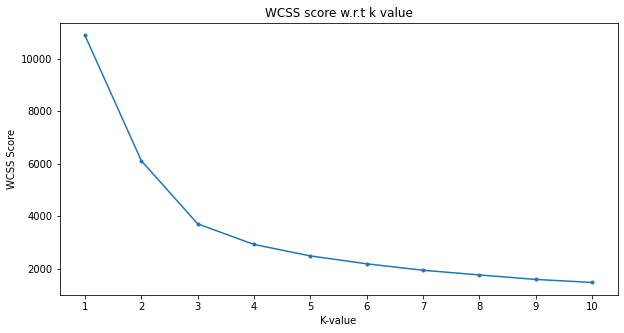

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(k_values, wcss, marker = ".")
plt.xlabel('K-value')
plt.ylabel('WCSS Score')
plt.xticks(range(1,11))
plt.title('WCSS score w.r.t k value')
plt.show()

**As we can see, the elbow shape of the graph is bending at the value of k = 3. This means that for our data, 3 clusters are recommended.**

In [ ]:
kmeans = KMeans(n_clusters = 3)

In [ ]:
kmeans.fit(rfm_scaled_df)

KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[-0.30336719, -0.49426542, -0.3177046 ],
       [-0.59589978,  1.48117309, -0.61647821],
       [ 1.42873862, -0.554063  ,  1.48734836]])

In [ ]:
clusters = kmeans.labels_
RFM = rfm_scaled_df 
RFM['labels'] = clusters

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


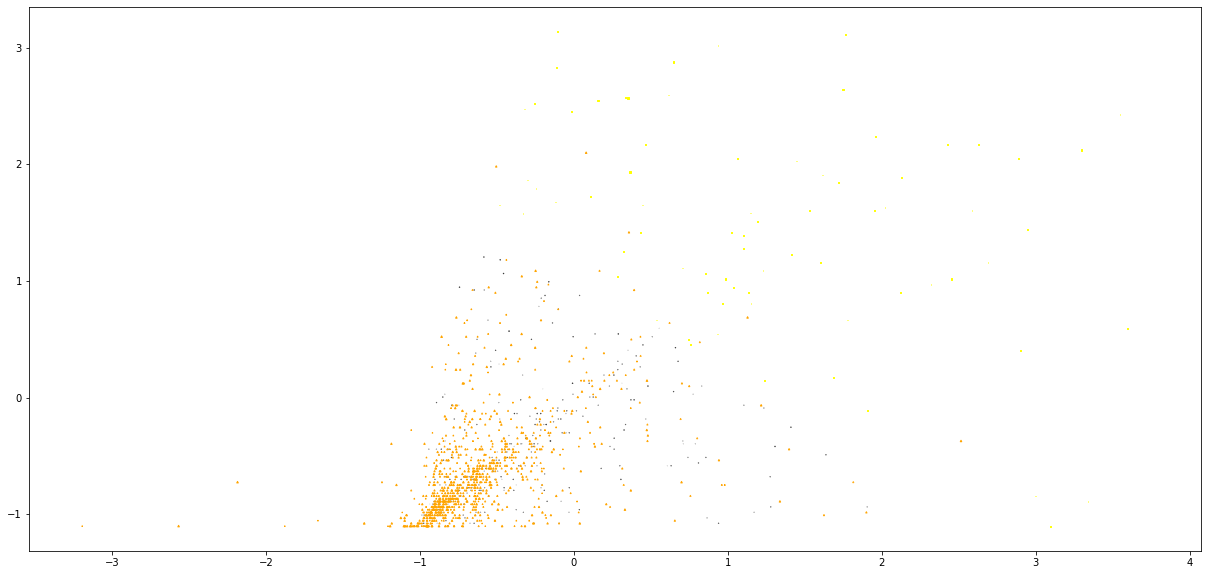

In [ ]:
plt.figure(figsize=(21,10))
plt.scatter(RFM["Amount"][RFM.labels == 0], RFM["Frequency"][RFM.labels == 0], RFM["Recency"][RFM.labels == 0], c='black', marker = '.',alpha=1)
plt.scatter(RFM["Amount"][RFM.labels == 1],RFM["Frequency"][RFM.labels == 1], RFM["Recency"][RFM.labels == 1], c='orange', marker = '^',alpha=1)
plt.scatter(RFM["Amount"][RFM.labels == 2], RFM["Frequency"][RFM.labels == 2], RFM["Recency"][RFM.labels == 2], c='yellow', marker = ',', alpha=1)
plt.show()

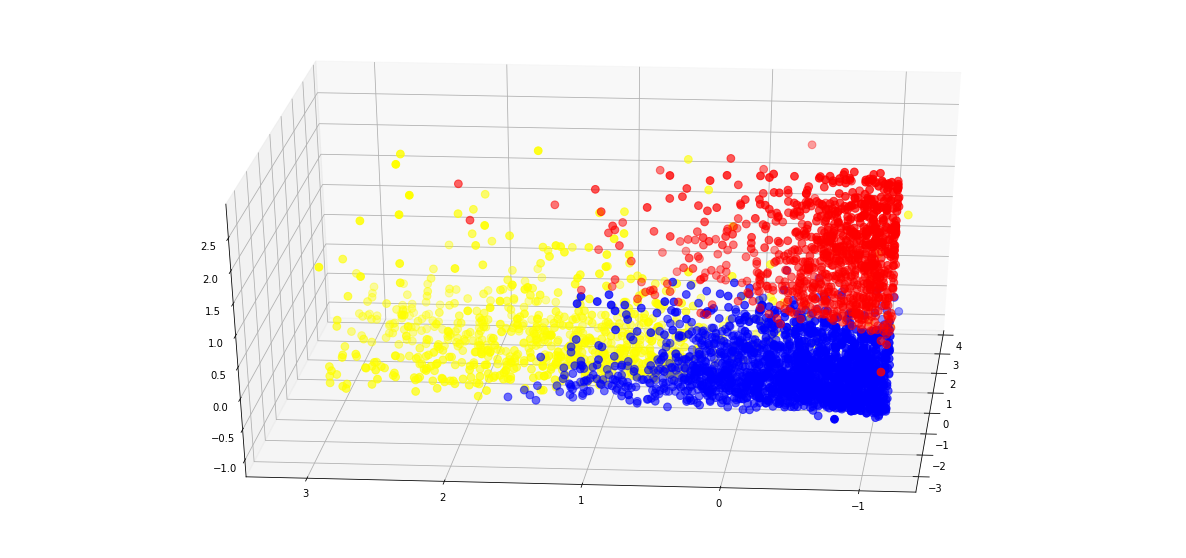

In [ ]:
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM["Amount"][RFM.labels == 0], RFM["Frequency"][RFM.labels == 0], RFM["Recency"][RFM.labels == 0], c='blue', s=60)
ax.scatter(RFM["Amount"][RFM.labels == 1],RFM["Frequency"][RFM.labels == 1], RFM["Recency"][RFM.labels == 1], c='red', s=60)
ax.scatter(RFM["Amount"][RFM.labels == 2], RFM["Frequency"][RFM.labels == 2], RFM["Recency"][RFM.labels == 2], c='yellow', s=60)
ax.view_init(30, 185)
plt.show()

In [ ]:
rfm_scaled_df.head()

,Amount,Recency,Frequency,labels
0,-1.056277,2.351537,-1.076164,1
1,1.355840,-0.239067,-0.393805,0
2,1.302571,-0.817050,0.594439,2
3,-0.607471,2.186399,-0.723220,1
4,1.017853,-0.641591,1.112091,2


In [ ]:
kmeans.predict([[1.355840,	-0.239067,-0.393805	]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [ ]:
prediction_df = rfm_scaled_df[['Amount', 'Recency',	'Frequency']]

In [ ]:
prediction_df['CustomerID'] = rmf_df['CustomerID']

In [ ]:
prediction_df.head()

,Amount,Recency,Frequency,CustomerID
0,-1.056277,2.351537,-1.076164,12346.0
1,1.355840,-0.239067,-0.393805,12348.0
2,1.302571,-0.817050,0.594439,12349.0
3,-0.607471,2.186399,-0.723220,12350.0
4,1.017853,-0.641591,1.112091,12352.0


In [ ]:
def predict_cluster(CustomerID):
  input = prediction_df[['Amount',	'Recency',	'Frequency']][prediction_df['CustomerID'] == CustomerID].values
  return kmeans.predict(input)

In [ ]:
prediction_df[['Amount',	'Recency',	'Frequency']][prediction_df['CustomerID'] == 12346].values

array([[-1.05627655,  2.35153665, -1.07616428]])

In [ ]:
predict_cluster(12348)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [ ]:
rmf_df['Clusters'] = kmeans.labels_
analysis = rmf_df.groupby('Clusters').agg({
    'recency':['mean','max','min'],
    'Frequency':['mean','max','min'],
    'amount':['mean','max','min','count']})

In [ ]:
analysis

recency             Frequency                amount           \
                mean  max  min        mean  max min         mean      max   
Clusters                                                                    
0          49.265092  166    0   34.260892  121   1   561.199681  2207.40   
1         240.671674  362  133   21.536481  137   1   343.021406  2661.24   
2          43.494949  337    0  110.981061  181   1  1852.666895  3563.85   

                         
              min count  
Clusters                 
0        -1165.30  1905  
1        -1592.49   932  
2          360.93   792

**Cluster 0 - Rare Customers, low purchase frequency and minimal spending**

**Cluster 1 - Frequent Customers, high purchase frequency and highest spending**

**Cluster 2 - Frequent Customers, low purchase frequency and less spending**